In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [10]:
# Importing the dataset
DATASET_COLUMNS=['target','ids','date','flag','user','text']
DATASET_ENCODING = "ISO-8859-1"
df = pd.read_csv("C:\\Users\\arunk\\OneDrive\\Desktop\\twitter_new.csv", encoding=DATASET_ENCODING, names=DATASET_COLUMNS)
df.sample(10)

,target,ids,date,flag,user,text
689607,0,2251800252,Sat Jun 20 04:37:06 PDT 2009,NO_QUERY,Jamjar84,I want chocolate.
352532,0,2031178644,Thu Jun 04 09:26:45 PDT 2009,NO_QUERY,JadeLittish,soundd PLEASE workkk!!!!!!!!!!
156158,0,1956045517,Thu May 28 21:05:05 PDT 2009,NO_QUERY,TrishwaH,Feeling thought make-up would help. now I jus...
161556,0,1957338393,Fri May 29 00:11:56 PDT 2009,NO_QUERY,crataegustess,"@philcampbell blue skies? where, it's still gr..."
194586,0,1970318837,Sat May 30 03:22:12 PDT 2009,NO_QUERY,coffeeegirl,@vanitydoll omg haha its soo cute! I want to b...
818157,4,1552003545,Sat Apr 18 10:32:02 PDT 2009,NO_QUERY,SpaGirlKris,Heading off to the gun range to learn about sh...
745548,0,2282453148,Mon Jun 22 11:23:17 PDT 2009,NO_QUERY,Blessed_Barbie,Good Afternoon Tweets! Chillin With the Bff..s...
833281,4,1557732045,Sun Apr 19 05:44:22 PDT 2009,NO_QUERY,Jodiesupertramp,waiting for becci to come round so that we can...
125260,0,1834281059,Mon May 18 02:19:42 PDT 2009,NO_QUERY,Buzzyboo,@rosiej i have to watch home &amp; away on you...
44611,0,1676913782,Fri May 01 23:41:22 PDT 2009,NO_QUERY,bakadrgn,"@itzmandieyo i know lol. check this vid out, i..."


In [12]:
df.shape

(1000001, 6)

In [13]:
df_copy = df.copy()

In [17]:
df_copy['word counts'] = df_copy['text'].apply(lambda x : len(x.split()))
df_copy.head()

,target,ids,date,flag,user,text,word counts
0,Sentiment,Id,Date,Flag,User,Tweet,1
1,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",19
2,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,21
3,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,18
4,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,10


In [18]:
def char_counts(x):
    x = x.split()
    x = ''.join(x)
    return len(x)

In [20]:
df_copy['char_counts'] = df_copy['text'].apply(lambda x : char_counts(x))
df_copy.head()

,target,ids,date,flag,user,text,word counts,char_counts
0,Sentiment,Id,Date,Flag,User,Tweet,1,5
1,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",19,96
2,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,21,90
3,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,18,71
4,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,10,37


In [23]:
df_copy['average_word_len'] = df_copy['char_counts']/df_copy['word counts']
df_copy.head()

,target,ids,date,flag,user,text,word counts,char_counts,average_word_len
0,Sentiment,Id,Date,Flag,User,Tweet,1,5,5.000000
1,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",19,96,5.052632
2,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,21,90,4.285714
3,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,18,71,3.944444
4,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,10,37,3.700000


In [24]:
from nltk.corpus import stopwords


In [25]:
stopwords = stopwords.words('english')

In [26]:
df['text'] = df['text'].apply(lambda x : ''.join([t for t in x.split() if t not in stopwords]))

In [27]:
df.head()

,target,ids,date,flag,user,text
0,Sentiment,Id,Date,Flag,User,Tweet
1,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoothttp://twitpic.com/2y1zl-Awww,that'..."
2,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,upsetcan'tupdateFacebooktextingit...mightcryre...
3,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@KenichanIdivedmanytimesball.Managedsave50%The...
4,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,wholebodyfeelsitchylikefire


In [28]:
def remove(x):
    x = x.split()
    for i in range(len(x)):
        if(x[i].startswith('@')):
          x[i] = x[i].replace('@','')
        elif(x[i].startswith('#')):
            x[i].replace('#','')
    return ''.join(x)

In [29]:
remove('@robbiebronniman Sounds like great night')

'robbiebronnimanSoundslikegreatnight'

In [31]:
df['text'] = df['text'].apply(lambda x : remove(x))

In [32]:
df.head()

,target,ids,date,flag,user,text
0,Sentiment,Id,Date,Flag,User,Tweet
1,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"switchfoothttp://twitpic.com/2y1zl-Awww,that's..."
2,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,upsetcan'tupdateFacebooktextingit...mightcryre...
3,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,KenichanIdivedmanytimesball.Managedsave50%Ther...
4,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,wholebodyfeelsitchylikefire


In [33]:
df_copy.head()

,target,ids,date,flag,user,text,word counts,char_counts,average_word_len
0,Sentiment,Id,Date,Flag,User,Tweet,1,5,5.000000
1,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",19,96,5.052632
2,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,21,90,4.285714
3,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,18,71,3.944444
4,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,10,37,3.700000


In [34]:
df_copy['numeric_counts'] = df_copy['text'].apply(lambda x : len([t for t in x.split() if t.isdigit()]))

In [35]:
df_copy[df_copy['numeric_counts']==5]

,target,ids,date,flag,user,text,word counts,char_counts,average_word_len,numeric_counts
8734,0,1548341270,Fri Apr 17 20:41:16 PDT 2009,NO_QUERY,HayleyyFitch,@sydneohhh aww no its not hot at all! today i...,33,103,3.121212,5
22699,0,1557548816,Sun Apr 19 04:46:29 PDT 2009,NO_QUERY,4mariam,"I Went 2 school 4 2 hours only , the nurse cal...",24,64,2.666667,5
29843,0,1563599632,Sun Apr 19 23:28:05 PDT 2009,NO_QUERY,alyssawang,"2 exams, 1 paper, 1 quiz, 1 project, +hw all i...",14,48,3.428571,5
70249,0,1693599250,Sun May 03 23:05:15 PDT 2009,NO_QUERY,nkotb427,@donniewahlberg wanted 2 b there but had 2 com...,22,83,3.772727,5
108295,0,1824234530,Sun May 17 00:32:40 PDT 2009,NO_QUERY,sparkay,"its nearly 330 in the am, i've barely slept &a...",32,113,3.531250,5
...,...,...,...,...,...,...,...,...,...,...
895892,4,1692853483,Sun May 03 20:56:34 PDT 2009,NO_QUERY,MichaelCBeck,I did it!!! I finished Wildflower triathalon i...,22,90,4.090909,5
916101,4,1753238118,Sun May 10 00:42:20 PDT 2009,NO_QUERY,KimOFDakiraAve,*sigh* Off 2 bed 2 try 2 get these crummy 2 hr...,27,110,4.074074,5
947170,4,1822942647,Sat May 16 20:44:46 PDT 2009,NO_QUERY,MTVnHollyWEST23,@Lyriqal Im a solid 21 and a HALF I luv my age...,35,98,2.800000,5
953793,4,1824713036,Sun May 17 02:35:59 PDT 2009,NO_QUERY,TomJensen76,@MianneBagger ok. I seriously wld luv 2 do it ...,28,103,3.678571,5


In [36]:
df_copy.iloc[12969]

target                                                              0
ids                                                        1552060370
date                                     Sat Apr 18 10:41:00 PDT 2009
flag                                                         NO_QUERY
user                                                           babyxj
text                dear morrissey, stop cancelling shows. it bums...
word counts                                                        19
char_counts                                                       104
average_word_len                                             5.473684
numeric_counts                                                      0
Name: 12969, dtype: object

In [37]:
def remove_digit(x):
    x = x.split()
    for t in range(0,len(x)):
        if(x[t].isdigit()):
            x[t] = ''
    return ''.join(x)

In [38]:
df['text'] = df['text'].apply(lambda x : remove_digit(x))

In [39]:
df['text'] = df['text'].apply(lambda x : str(x).lower())

In [40]:
df.iloc[12969]

target                                                    0
ids                                              1552060370
date                           Sat Apr 18 10:41:00 PDT 2009
flag                                               NO_QUERY
user                                                 babyxj
text      dearmorrissey,stopcancellingshows.bumspeopleou...
Name: 12969, dtype: object

In [41]:
contractions = {
    "ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how does",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so is",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
" u ": " you ",
" ur ": " your ",
" n ": " and ",
"won't": "would not",
'dis': 'this',
'bak': 'back',
'brng': 'bring',
"won't":"would not",
'dis':'this',
"bak":"back",
"brng":'bring',
"i'v" : 'i have'
}

In [44]:
def expand(x):
    if type(x) is str:
       for key in contractions:
           value = contractions[key]
           x = x.replace(key,value)
       return x
    else:
         return x

In [46]:
df['text'] = df['text'].apply(lambda x : expand(x))

In [47]:
import re


In [49]:
# re.findall(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+)',x)
df_copy['emails'] = df_copy['text'].apply(lambda x : re.findall(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+)',x))
df_copy['email_count'] = df_copy['emails'].apply(lambda x : len(x))
df_copy[df_copy['email_count']==1]

,target,ids,date,flag,user,text,word counts,char_counts,average_word_len,numeric_counts,emails,email_count
4055,0,1468735195,Tue Apr 07 03:26:47 PDT 2009,NO_QUERY,gabbyeight,I want a new laptop. HP TX2000 is the bomb. :...,20,83,4.150000,0,[gabbehhramos@yahoo.com],1
7918,0,1470004086,Tue Apr 07 08:03:42 PDT 2009,NO_QUERY,ElleDell,who stole elledell@gmail.com?,3,27,9.000000,0,[elledell@gmail.com],1
8497,0,1470213042,Tue Apr 07 08:41:06 PDT 2009,NO_QUERY,missatari,@alexistehpom really? did you send out all th...,20,110,5.500000,0,[missataari@gmail.com],1
10291,0,1550847940,Sat Apr 18 07:26:12 PDT 2009,NO_QUERY,caaaitysarah,@LaureyStack awh...that's kinda sad lol add m...,8,68,8.500000,0,[hello.kitty.65@hotmail.com],1
16414,0,1555904035,Sat Apr 18 21:02:02 PDT 2009,NO_QUERY,kluo,"@jilliancyork got 2 bottom of it, human error...",21,114,5.428571,1,[press@linkedin.com],1
...,...,...,...,...,...,...,...,...,...,...,...,...
994662,4,1835590994,Mon May 18 06:20:03 PDT 2009,NO_QUERY,maggiewhitley,sewing up some orders for my Etsy shop: www.ma...,18,118,6.555556,0,[whitley.maggie@gmail.com],1
995132,4,1835658485,Mon May 18 06:28:50 PDT 2009,NO_QUERY,tiphaniebrooke,"@krabumple t.tart@antigirl.com - yes, definite...",14,80,5.714286,0,[t.tart@antigirl.com],1
998806,4,1836339846,Mon May 18 07:49:17 PDT 2009,NO_QUERY,dogstrust,"@ideasuk We release places in Oct/Nov, after b...",18,112,6.222222,0,[fundraiseforus@dogstrust.org.uk],1
999378,4,1836456791,Mon May 18 08:01:54 PDT 2009,NO_QUERY,jnozzi,@drewmccormack If you'd like to discuss in mor...,17,100,5.882353,0,[joshua@nozzi.name],1


In [50]:
df['text'] = df['text'].apply(lambda x : re.sub(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+)'," ",x))

In [52]:
df['text'] = df['text'].apply(lambda x : re.sub(r'[^\w]+'," ",x))


In [53]:
df['text'].apply(lambda x : re.sub(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?'," ",x))


0                                                      tweet
1          switchfoothttp twitpic com 2y1zl awww that isb...
2          upsetcannotupdatefacebooktextingit mightcryres...
3          kenichanidivedmanytimesball managedsave50 ther...
4                                wholebodyfeelsitchylikefire
                                 ...                        
999996                          healingsingerthankyou needed
999997                        vactresshttp bit ly cadeamaybe
999998               brat13hell windows7pricerangeunlessfree
999999     jigardoshineah wish reminiscingreadpostlasttweet 
1000000    msteagan andway irewatchedsungoddesslastnight ...
Name: text, Length: 1000001, dtype: object

In [54]:
df.head()

,target,ids,date,flag,user,text
0,Sentiment,Id,Date,Flag,User,tweet
1,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,switchfoothttp twitpic com 2y1zl awww that isb...
2,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,upsetcannotupdatefacebooktextingit mightcryres...
3,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,kenichanidivedmanytimesball managedsave50 ther...
4,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,wholebodyfeelsitchylikefire


In [55]:
df['text'] = df['text'].apply(lambda x : ' '.join(x.split()))

In [56]:
from bs4 import BeautifulSoup

In [57]:
df['text'] = df['text'].apply(lambda x : BeautifulSoup(x,'lxml').get_text().strip())

In [58]:
import unicodedata


In [59]:
def remove_accented(x):
 x = unicodedata.normalize('NFKD',x).encode('ascii','ignore').decode('utf-8','ignore')
 return x

In [60]:
df.tail()


,target,ids,date,flag,user,text
999996,4,1879942807,Thu May 21 23:36:19 PDT 2009,NO_QUERY,divabat,healingsingerthankyou needed
999997,4,1879942922,Thu May 21 23:36:20 PDT 2009,NO_QUERY,nick1975,vactresshttp bit ly cadeamaybe
999998,4,1879942975,Thu May 21 23:36:21 PDT 2009,NO_QUERY,znmeb,brat13hell windows7pricerangeunlessfree
999999,4,1879943113,Thu May 21 23:36:22 PDT 2009,NO_QUERY,virmani,jigardoshineah wish reminiscingreadpostlasttweet
1000000,4,1879943219,Thu May 21 23:36:24 PDT 2009,NO_QUERY,redcomet81,msteagan andway irewatchedsungoddesslastnight ...


In [61]:
df['text'] = df['text'].apply(lambda x : remove_accented(x))

In [62]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
stemmer = PorterStemmer()

In [70]:
def convert_base(x):
    words = word_tokenize(x)
    l = []
    for w in words:
        base = stemmer.stem(w)
        l.append(base)
    return ' '.join(l)

In [75]:
df['text'] = df['text'].apply(lambda x : convert_base(x))

LookupError: 
**********************************************************************
  Resource [93mpunkt[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt/english.pickle[0m

  Searched in:
    - 'C:\\Users\\arunk/nltk_data'
    - 'c:\\Users\\arunk\\AppData\\Local\\Programs\\Python\\Python310\\nltk_data'
    - 'c:\\Users\\arunk\\AppData\\Local\\Programs\\Python\\Python310\\share\\nltk_data'
    - 'c:\\Users\\arunk\\AppData\\Local\\Programs\\Python\\Python310\\lib\\nltk_data'
    - 'C:\\Users\\arunk\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - ''
**********************************************************************


Common Occurring words Removal

In [76]:
text = ' '.join(df['text'])
len(text)

47308595

In [77]:
text = text.split()

In [78]:
freq_comm = pd.Series(text).value_counts()

In [79]:
fre = freq_comm[:20]


In [80]:
df['text'] = df['text'].apply(lambda x : ' '.join([w for w in x.split() if w not in fre]))

In [82]:
df.sample(10)

,target,ids,date,flag,user,text
307060,0,2000382583,Mon Jun 01 21:59:55 PDT 2009,NO_QUERY,tracyewilli,jenjo636possible rarelysleepfivehours
871653,4,1678756161,Sat May 02 07:38:13 PDT 2009,NO_QUERY,bostonbibliophl,rebachinbetchayou
961102,4,1826984753,Sun May 17 09:44:37 PDT 2009,NO_QUERY,killasweet,ericscott3heywho
634812,0,2233420173,Thu Jun 18 21:19:45 PDT 2009,NO_QUERY,aims6,newsgal81boo amgoingtowntraining15th 16th inev...
619660,0,2228033791,Thu Jun 18 13:56:21 PDT 2009,NO_QUERY,bobbylob,suprisevisitmatesteviejames nice nowdogwalking...
166010,0,1961121802,Fri May 29 09:01:07 PDT 2009,NO_QUERY,ALLLLEX,least30bugbiteslegs
641164,0,2235173173,Fri Jun 19 00:35:31 PDT 2009,NO_QUERY,Phoebo,judsaysjordansawpinkrobinacinemas chersie sian...
281662,0,1992393383,Mon Jun 01 08:40:51 PDT 2009,NO_QUERY,isabear92,humptydumptylosthands
117841,0,1827712346,Sun May 17 11:17:20 PDT 2009,NO_QUERY,Nikkipixel,themepunk rancid rejectedyeahfeelingwayright b...
639620,0,2234768344,Thu Jun 18 23:42:45 PDT 2009,NO_QUERY,sheaquinn,anntyantohi amhurt


In [83]:
rare20 = freq_comm.tail(100)

In [84]:
df['text'] = df['text'].apply(lambda x : ' '.join([w for w in x.split() if w not in rare20]))


In [85]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [125]:
neg_text = df[df["target"]==0]

In [126]:
neg_text = ' '.join(neg_text['text'])

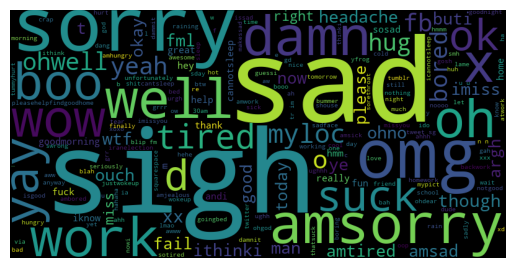

In [127]:
wc = WordCloud(width = 800,height = 400).generate(neg_text)
plt.imshow(wc)
plt.axis('off')
plt.show()

In [128]:
pos_text = df[df['target']==1]


In [129]:
pos_text = " ".join(pos_text['text'])

In [142]:
wc = WordCloud(width = 800, height = 400).generate(pos_text)
plt.imshow(wc)
plt.axis('off')
plt.show()

ValueError: We need at least 1 word to plot a word cloud, got 0.

In [143]:
df['target'].value_counts()

target
0            668929
4            200000
0            131071
Sentiment         1
Name: count, dtype: int64

In [144]:
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [145]:
X = df['text']
y = df['target']

In [147]:
tfidf = TfidfVectorizer(norm = 'l1')

In [171]:
X = tfidf.fit_transform(df['text'])
